# Рубежный контроль 1
### Яковенко Юлия РТ5-61Б
### Вариант 18

**Задание:**

Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака.

Для пары произвольных колонок данных построить график "Jointplot"

[Набор данных](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
wine = load_wine()

In [4]:
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
# проверим есть ли пропущенные значения
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## Jointplot

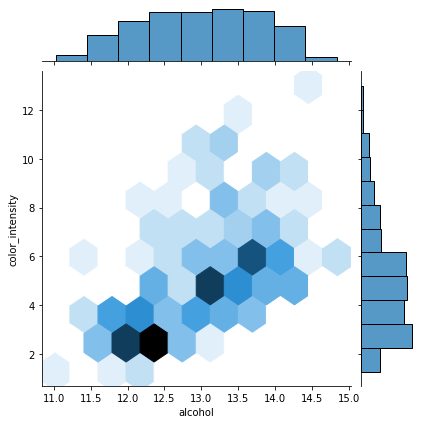

In [7]:
sns.jointplot(x='alcohol', y='color_intensity', data=df, kind="hex")

## Масштабирование данных (для одного признака)

In [9]:
sc = MinMaxScaler()
sc_df = sc.fit_transform(df[['alcohol']])

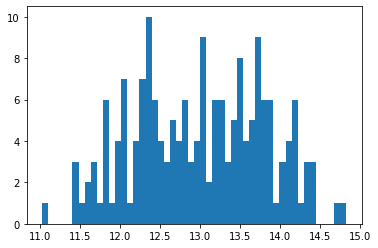

In [11]:
plt.hist(df['alcohol'], 50)
plt.show()

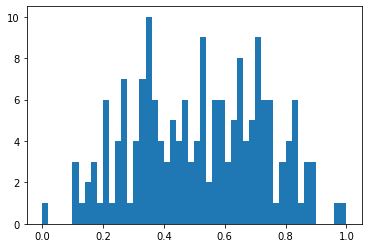

In [12]:
plt.hist(sc_df, 50)
plt.show()

## Преобразование категориальных признаков в количественные

### Искусственно создадим категориальный признак на основе числового

In [13]:
df2 = df

In [17]:
df2['alcohol'].min(), df2['alcohol'].max()

(11.03, 14.83)

In [25]:
cat = [df2['alcohol'].min()+(df2['alcohol'].max()-df2['alcohol'].min())/3, 
      df2['alcohol'].min()+(df2['alcohol'].max()-df2['alcohol'].min())*2/3]

for i in range(df2.shape[0]):
    if df2['alcohol'][i] < cat[0]:
        df2['alcohol'][i] = "A"
    elif df2['alcohol'][i] < cat[1]:
        df2['alcohol'][i] = "B"
    else:
        df2['alcohol'][i] = "C"
        
df2['alcohol']

0      C
1      B
2      B
3      C
4      B
      ..
173    C
174    B
175    B
176    B
177    C
Name: alcohol, Length: 178, dtype: object

In [29]:
cat_enc = pd.DataFrame({'c1':df2["alcohol"]})
cat_enc

,c1
0,C
1,B
2,B
3,C
4,B
...,...
173,C
174,B
175,B
176,B


### Использование LabelEncoder

In [30]:
cat_enc['c1'].unique()

array(['C', 'B', 'A'], dtype=object)

In [31]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [32]:
le.classes_

array(['A', 'B', 'C'], dtype=object)

In [33]:
cat_enc_le

array([2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1,
       1, 2])

In [35]:
le.inverse_transform([0, 1, 2])

array(['A', 'B', 'C'], dtype=object)

### Использование one-hot encoding

In [36]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [37]:
cat_enc.shape

(178, 1)

In [38]:
cat_enc_ohe.shape

(178, 3)

In [39]:
cat_enc_ohe.todense()

matrix([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0